# Example usage of trainer class

In [1]:
# autoreload after code has changed
%load_ext autoreload
%autoreload 2

In [3]:
import os

# move into the correct dirrectory, e.g. move up one directory level iif this cell is run for the first time
try:
    a = first_time
except NameError:
    print("Running first time, moving up one dir level")
    os.chdir('..')  # Move up one directory level to the root directory of project
    first_time = False

print("This path should be the root directory of the project: ", os.getcwd())
    


This path should be the root directory of the project:  /home/daniel/Documents/TUM/ADLR/tum-adlr-02


## Define Dataset
Creating the dataset object and applzing transformations to the data.

In [4]:
from data.model_classes import Mug, Bottle
from data.dataconverter import DataConverter

# generate data
dataconverter = DataConverter(
    classes=[Mug(),Bottle()],
    min_order = 1,
    tact_order = 2,
    tact_number=1
    
)
# set regenerate to true, if you run this after changes in dataconverter have been made
dataconverter.generate_2d_dataset(show_results=False, regenerate=False)


class mug already downloaedd. Skipping download.
class bottle already downloaedd. Skipping download.
2D images for classmug already exist. Skipping conversion.
2D images for classbottle already exist. Skipping conversion.
Generating annotation CSV files for training and testing with a split ratio of 0.9:0.1.
Finished generating annotation CSV files for 71200 different shapes.


In [5]:
from data.reconstruction_dataset import *

csv_file = './datasets/2D_shapes/annotations.csv'
root_dir = './datasets/2D_shapes'
composed = transforms.Compose([RandomOrientation(),
                               ToTensor()])

dataset = ReconstructionDataset(csv_file=csv_file,
                                root_dir=root_dir,
                                transform=composed)

Examplary data pairs:

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])


<Figure size 640x480 with 0 Axes>

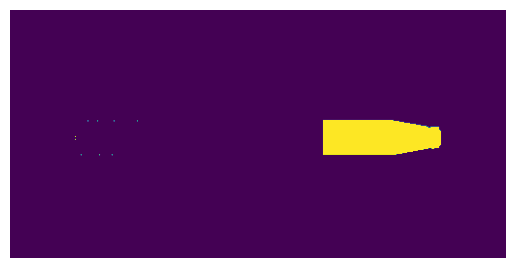

In [6]:
example_data = dataset[5]

plt.figure()
print(example_data['image'])
show_datapair(example_data['image'], example_data['label'])
plt.show()

## Choose Hyperparamters

Look into the file neural_nets.trainer to see which hyperparameters you can choose.
The seperation into tunable and non tunable hyperparameters is made, because this makes parameter searches with ray easier.


#### Non Tunable Hyperparameters


In [17]:
from neural_nets.trainer import NonTHparams


nt_h = NonTHparams()
nt_h.num_epochs = 50
nt_h.train_prop = 0.9

nt_h.log_train_period = 100
nt_h.log_val_period = -1


#### Tunable Hyperparameters

In [18]:
import torch.nn as nn
import torch.optim as optim

from neural_nets.trainer import THparams
from neural_nets.weight_inits import weight_init_kx
from neural_nets.models.unet import UNet1, count_parameters


t_h = THparams()
t_h.batch_size = 16
t_h.lr = 1e-4
t_h.model = UNet1
t_h.optimizer = optim.Adam
t_h.loss_func = nn.BCELoss()
t_h.weight_init = weight_init_kx




TypeError: Module.named_parameters() missing 1 required positional argument: 'self'

## Initialize Trainer

In [19]:
from neural_nets.trainer import Trainer

trainer = Trainer(nt_h, dataset)


During training, progress will be logged to tensorboard. Go to project folder, activate appropritae conda environment and run 'tensorboard --logdir runs/' to see the logs.


## Training

In [ ]:
trainer.train(t_h)

loss:  0.691719114780426
Epoch [1/50], Step [1/3204], Train Loss: 0.6917 , Logging Time Proportion: 0.0160, Data Loading Time Proportion: 0.0019
loss:  0.6703320741653442
Epoch [1/50], Step [2/3204], Train Loss: 0.6703 , Logging Time Proportion: 0.0322, Data Loading Time Proportion: 0.0019
loss:  0.6240219473838806
Epoch [1/50], Step [3/3204], Train Loss: 0.6240 , Logging Time Proportion: 0.0353, Data Loading Time Proportion: 0.0025
loss:  0.5343635082244873
Epoch [1/50], Step [4/3204], Train Loss: 0.5344 , Logging Time Proportion: 0.0467, Data Loading Time Proportion: 0.0028
loss:  0.5776985883712769
Epoch [1/50], Step [5/3204], Train Loss: 0.5777 , Logging Time Proportion: 0.0332, Data Loading Time Proportion: 0.0023
loss:  0.480016827583313
Epoch [1/50], Step [6/3204], Train Loss: 0.4800 , Logging Time Proportion: 0.0353, Data Loading Time Proportion: 0.0022
loss:  0.4214510917663574
Epoch [1/50], Step [7/3204], Train Loss: 0.4215 , Logging Time Proportion: 0.0332, Data Loading Time